In [63]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('car_data.csv')
columns = ['Car_Name', 'Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']
df.columns = columns

In [65]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,City,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0
1,City,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0
2,City,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0
3,City,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0
4,City,2015,8.40,13.6,25000,Petrol,Dealer,Manual,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       169 non-null    object 
 1   Year           169 non-null    int64  
 2   Selling_Price  169 non-null    float64
 3   Present_Price  169 non-null    float64
 4   Kms_Driven     169 non-null    int64  
 5   Fuel_Type      169 non-null    object 
 6   Seller_Type    169 non-null    object 
 7   Transmission   169 non-null    object 
 8   Owner          169 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 12.0+ KB


In [67]:
df.Fuel_Type.value_counts(), df.Seller_Type.value_counts(), df.Transmission.value_counts(), df.Owner.value_counts(), df.Year.value_counts()

(Petrol    68
 Diesel    64
 CNG       37
 Name: Fuel_Type, dtype: int64,
 Dealer        93
 Individual    76
 Name: Seller_Type, dtype: int64,
 Automatic    97
 Manual       72
 Name: Transmission, dtype: int64,
 3    48
 1    44
 2    39
 0    38
 Name: Owner, dtype: int64,
 2015    39
 2016    26
 2014    21
 2013    18
 2017    17
 2012    14
 2011    12
 2010     8
 2009     5
 2005     3
 2006     2
 2008     2
 2003     1
 2018     1
 Name: Year, dtype: int64)

In [68]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [69]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,City,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0
1,City,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0
2,City,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0
3,City,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0
4,City,2015,8.40,13.6,25000,Petrol,Dealer,Manual,0


In [70]:
df.Car_Name.value_counts()

dzire            27
Kia Seltos       27
swift            26
City             25
i10              23
Skoda Octavia    22
Polo             19
Name: Car_Name, dtype: int64

cars = ['swift','i10','i20','city','corolla altis','verna','fortuner','brio','ciaz','innova','jazz','amaze','sx4','i10','alto k10']
df = df[df['Car_Name'].str.contains('|'.join(cars))]

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

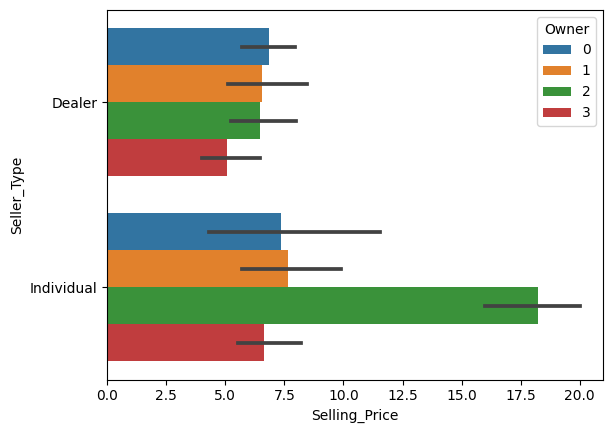

In [71]:
sns.barplot(df, x = df.Selling_Price, y = df.Seller_Type, hue = df.Owner)

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

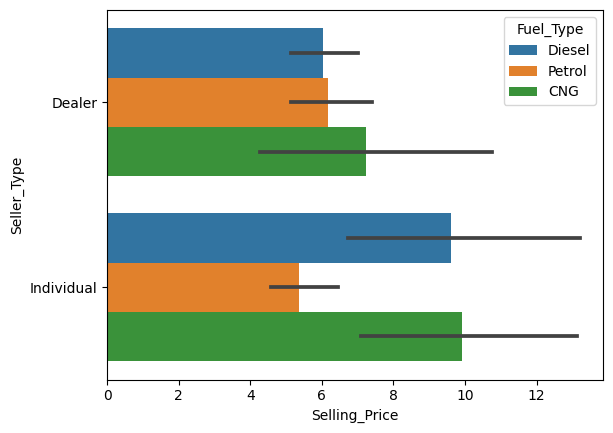

In [72]:
sns.barplot(df, x = df.Selling_Price, y = df.Seller_Type, hue = df.Fuel_Type)

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

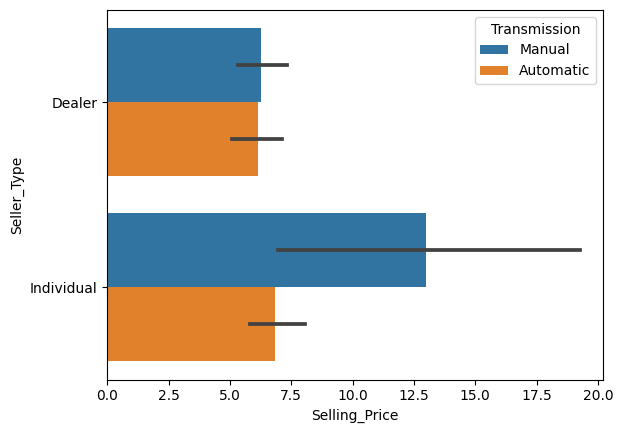

In [73]:
sns.barplot(df, x = df.Selling_Price, y = df.Seller_Type, hue = df.Transmission)

In [74]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,City,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0
1,City,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0
2,City,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0
3,City,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0
4,City,2015,8.40,13.6,25000,Petrol,Dealer,Manual,0


<AxesSubplot:xlabel='Kms_Driven', ylabel='Seller_Type'>

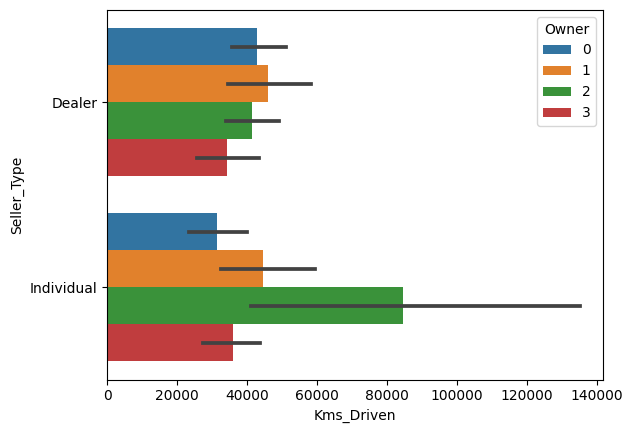

In [75]:
sns.barplot(df, x = df.Kms_Driven, y = df.Seller_Type, hue = df.Owner)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

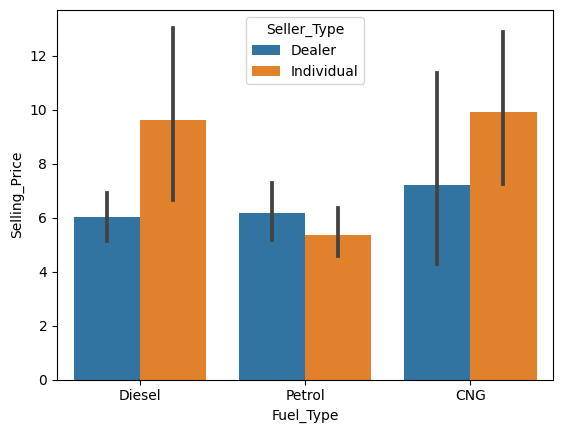

In [76]:
sns.barplot(df, x = df.Fuel_Type, y = df.Selling_Price, hue = df.Seller_Type)

Handling Categorical Data using OneHotEncoder

In [77]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,City,2014,7.20,9.9,48000,Diesel,Dealer,Manual,0
1,City,2013,5.25,9.9,54242,Petrol,Dealer,Manual,0
2,City,2016,10.25,13.6,49562,Petrol,Dealer,Manual,0
3,City,2015,8.50,13.6,40324,Petrol,Dealer,Manual,0
4,City,2015,8.40,13.6,25000,Petrol,Dealer,Manual,0


In [78]:
cols = ['Car_Name', 'Fuel_Type', 'Transmission', 'Seller_Type']
for col in cols:
    df = pd.concat([df, pd.get_dummies(df[col], drop_first=True)], axis = 1)

In [79]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Kia Seltos',
       'Polo', 'Skoda Octavia', 'dzire', 'i10', 'swift', 'Diesel', 'Petrol',
       'Manual', 'Individual'],
      dtype='object')

In [80]:
df.drop(columns = ['Car_Name','Fuel_Type','Seller_Type','Transmission'], inplace = True)

In [81]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Kia Seltos,Polo,Skoda Octavia,dzire,i10,swift,Diesel,Petrol,Manual,Individual
0,2014,7.20,9.9,48000,0,0,0,0,0,0,0,1,0,1,0
1,2013,5.25,9.9,54242,0,0,0,0,0,0,0,0,1,1,0
2,2016,10.25,13.6,49562,0,0,0,0,0,0,0,0,1,1,0
3,2015,8.50,13.6,40324,0,0,0,0,0,0,0,0,1,1,0
4,2015,8.40,13.6,25000,0,0,0,0,0,0,0,0,1,1,0


In [82]:
df['Car_Age'] = 2022 - df['Year']
df.drop(columns = ['Year'], inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Kia Seltos,Polo,Skoda Octavia,dzire,i10,swift,Diesel,Petrol,Manual,Individual,Car_Age
0,7.20,9.9,48000,0,0,0,0,0,0,0,1,0,1,0,8
1,5.25,9.9,54242,0,0,0,0,0,0,0,0,1,1,0,9
2,10.25,13.6,49562,0,0,0,0,0,0,0,0,1,1,0,6
3,8.50,13.6,40324,0,0,0,0,0,0,0,0,1,1,0,7
4,8.40,13.6,25000,0,0,0,0,0,0,0,0,1,1,0,7


In [83]:
y = df.Selling_Price
x = df.drop(columns = ['Selling_Price'])

In [84]:
x.head(), y.head()

(   Present_Price  Kms_Driven  Owner  Kia Seltos  Polo  Skoda Octavia  dzire  \
 0            9.9       48000      0           0     0              0      0   
 1            9.9       54242      0           0     0              0      0   
 2           13.6       49562      0           0     0              0      0   
 3           13.6       40324      0           0     0              0      0   
 4           13.6       25000      0           0     0              0      0   
 
    i10  swift  Diesel  Petrol  Manual  Individual  Car_Age  
 0    0      0       1       0       1           0        8  
 1    0      0       0       1       1           0        9  
 2    0      0       0       1       1           0        6  
 3    0      0       0       1       1           0        7  
 4    0      0       0       1       1           0        7  ,
 0     7.20
 1     5.25
 2    10.25
 3     8.50
 4     8.40
 Name: Selling_Price, dtype: float64)

In [85]:
x.shape, y.shape

((169, 14), (169,))

Lets start building our model
1. Spliting dataset into training and testing sets
2. Trying multiple Regression model for comparision
3. Enhancing the best performing model for maximum performance
4. Analysing the model performance
5. Exporting Pickle file

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y.values, train_size=0.83, random_state=10)

### Trying out below mentioned models
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree Regression
5. Random Forest

### Linear Regression

In [88]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [89]:
lr_model.fit(xtrain, ytrain)

LinearRegression()

In [90]:
lr_model.score(xtrain, ytrain), lr_model.score(xtest, ytest)

(0.9178973592068201, 0.8825828473524311)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_ypred = lr_model.predict(xtest)

lr_mae = mean_absolute_error(ytest, lr_ypred)
lr_mse = mean_squared_error(ytest, lr_ypred)
lr_r2 = r2_score(ytest, lr_ypred)
lr_mae, lr_mse, lr_r2

(1.0047552882939161, 3.289005342755412, 0.8825828473524311)

### Ridge Regression

In [92]:
from sklearn.linear_model import RidgeCV
rd_model = RidgeCV()
rd_model.fit(xtrain, ytrain)

RidgeCV()

In [93]:
rd_model.score(xtrain, ytrain), rd_model.score(xtest, ytest)

(0.917243432252507, 0.8832692102423314)

In [94]:
rd_ypred = rd_model.predict(xtest)

rd_mae = mean_absolute_error(ytest, rd_ypred)
rd_mse = mean_squared_error(ytest, rd_ypred)
rd_r2 = r2_score(ytest, rd_ypred)
rd_mae, rd_mse, rd_r2

(1.0006395804191937, 3.269779436139133, 0.8832692102423314)

### Lasso Regression

In [95]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV()
lasso_model.fit(xtrain, ytrain)

LassoCV()

In [96]:
lasso_model.score(xtrain, ytrain), lasso_model.score(xtest, ytest)

(0.6642345374203126, 0.6357018583287337)

In [97]:
lasso_ypred = lasso_model.predict(xtest)

lasso_mae = mean_absolute_error(ytest, lasso_ypred)
lasso_mse = mean_squared_error(ytest, lasso_ypred)
lasso_r2 = r2_score(ytest, lasso_ypred)
lasso_mae, lasso_mse, lasso_r2

(1.5633392332009763, 10.204459121139067, 0.6357018583287337)

### Decision Tree 

In [98]:
from sklearn.tree import DecisionTreeRegressor
dc_model = DecisionTreeRegressor()
dc_model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [99]:

dc_model.score(xtrain, ytrain), dc_model.score(xtest, ytest)

(1.0, 0.7302791518016851)

In [100]:
dc_ypred = dc_model.predict(xtest)

dc_mae = mean_absolute_error(ytest, dc_ypred)
dc_mse = mean_squared_error(ytest, dc_ypred)
dc_r2 = r2_score(ytest, dc_ypred)
dc_mae, dc_mse, dc_r2

(1.3917241379310346, 7.555227586206896, 0.7302791518016851)

### Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [102]:
rf_model.score(xtrain, ytrain), rf_model.score(xtest, ytest)

(0.9895358697256083, 0.800476802512855)

In [103]:
rf_ypred = rf_model.predict(xtest)

rf_mae = mean_absolute_error(ytest, rf_ypred)
rf_mse = mean_squared_error(ytest, rf_ypred)
rf_r2 = r2_score(ytest, rf_ypred)
rf_mae, rf_mse, rf_r2

(1.1092172413793107, 5.588901176206899, 0.800476802512855)

As expected RandomForest performs well in prediction with minimum MAE, MSE and maximum R2 score.

### Hyper Tunning

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
n_estimators = [int(x) for x in np.linspace(50,100,10)]
max_depth = [int(x) for x in np.linspace(10,40,5)]
min_samples_leaf = [2,4,6,8]
min_samples_split = [5,10,15,20]
max_features = ['auto','sqrt']


parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    'min_samples_split' : min_samples_split
}

In [106]:
randomcv = RandomizedSearchCV(estimator = rf_model, param_distributions = parameters, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 10, verbose = 2)

In [107]:
randomcv.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=94; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=55; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=61; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=17, max_features=sqrt, min_sa

c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.1s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=32, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=83; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.1s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.0s


c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=66; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=94; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=94; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=94; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=94; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=94; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=94; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_

c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 17, 25, 32, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [50, 55, 61, 66, 72, 77,
                                                         83, 88, 94, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [108]:
randomcv.best_params_

{'n_estimators': 61,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40}

In [109]:
randomcv_ypred = randomcv.predict(xtest)

In [110]:
randomcv_mae = mean_absolute_error(ytest, randomcv_ypred)
randomcv_mse = mean_squared_error(ytest, randomcv_ypred)
randomcv_r2 = r2_score(ytest, randomcv_ypred)
randomcv_mae, randomcv_mse, randomcv_r2

(1.365591243523472, 10.156723811212782, 0.6374060039862162)

importing out pickle file

In [123]:
import pickle
pickle.dump(rf_model, open('car_price.pkl','wb'))

In [124]:
rf_model.predict([[1.2,45000,2,0,0,0,0,0,1,0,1,1,1,3]])

array([3.4525])

3.534893937325233